Loading dataset from DatasetForCoffeeSales2.csv
Date column converted to datetime
Dataset loaded with 730 rows
Columns: Date, Customer_ID, City, Category, Product, Unit Price, Quantity, Sales Amount, Used_Discount, Discount_Amount, Final Sales, Coffee_Bean_Type, Bean_Category, Price_Category
Visualization 1: Bean distribution chart


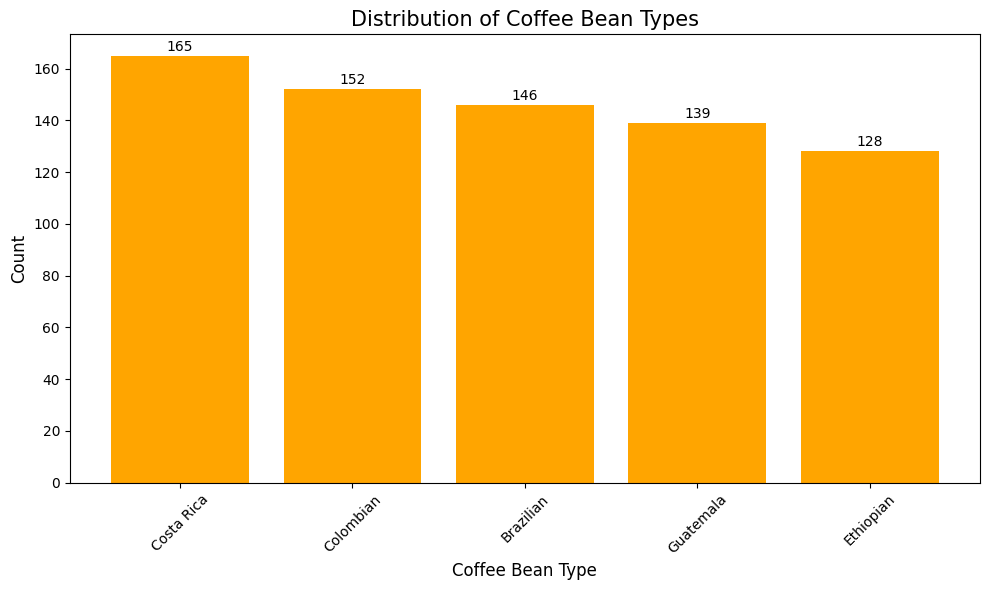

Visualization 2: Price categories chart


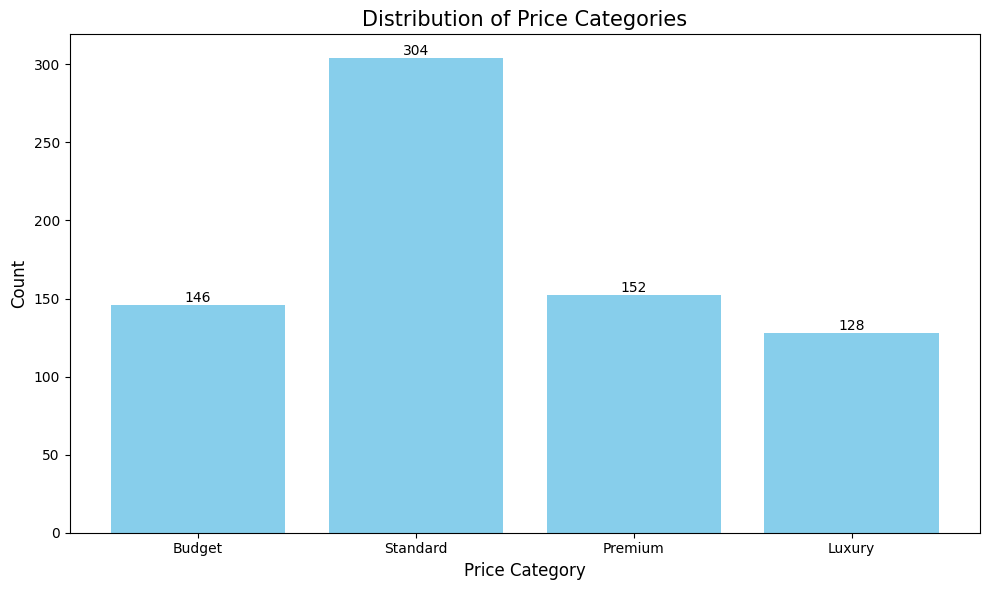

Visualization 3: Price-quantity relationship chart


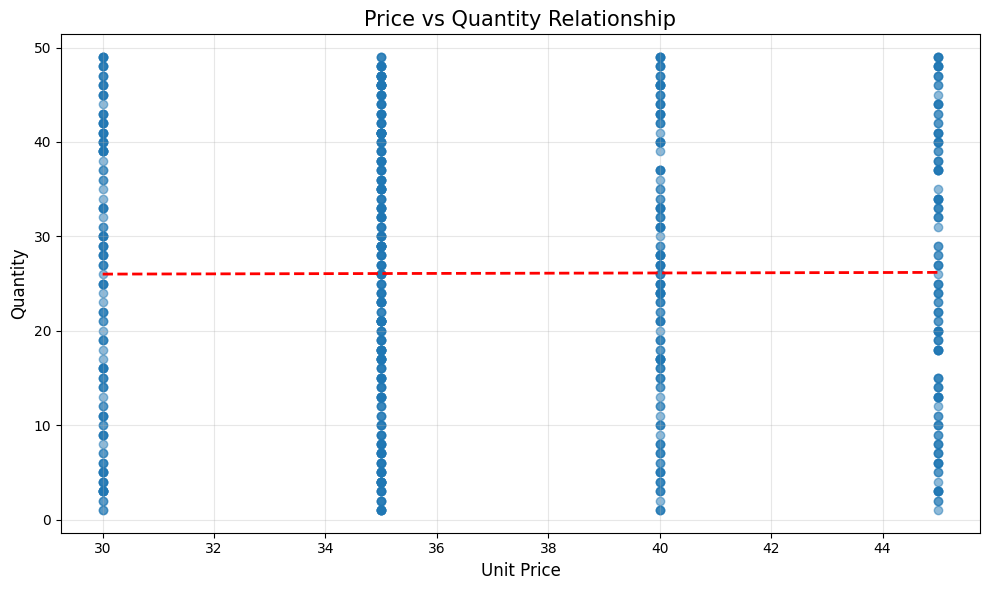

Visualization 4: Bean category boxplot


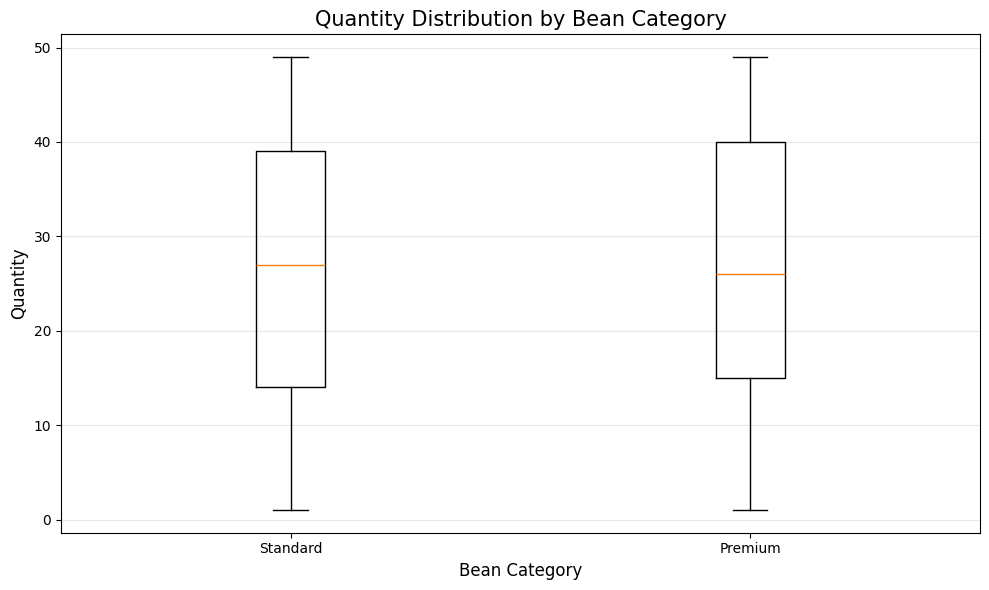

Creating Month column from Date
Visualization 5: Monthly sales line chart


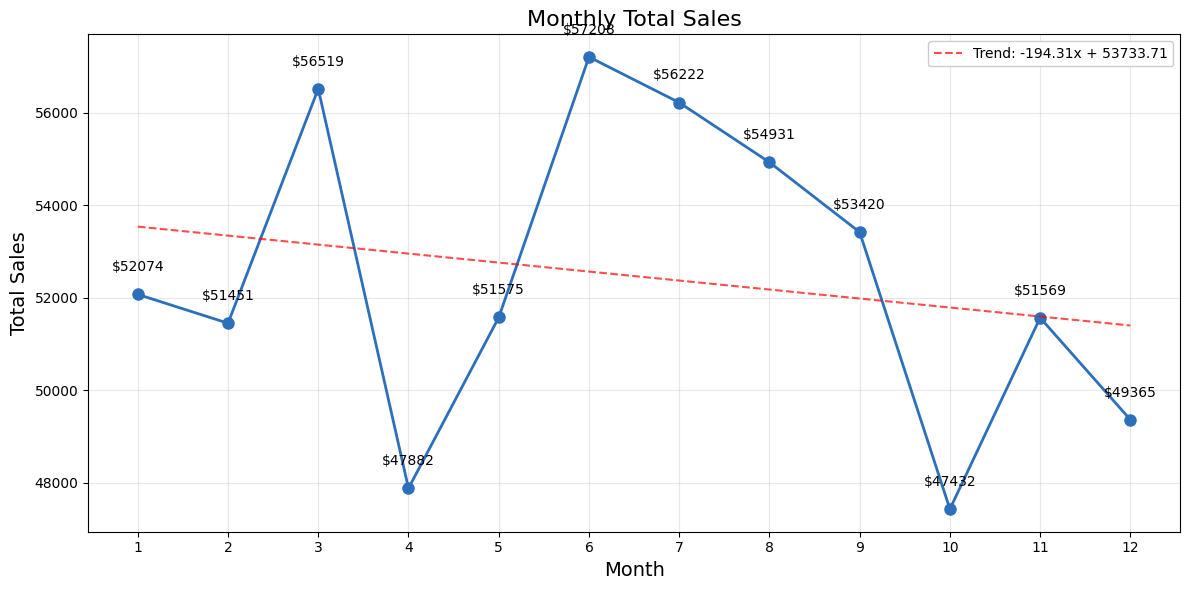

Visualization 6: Discount usage chart


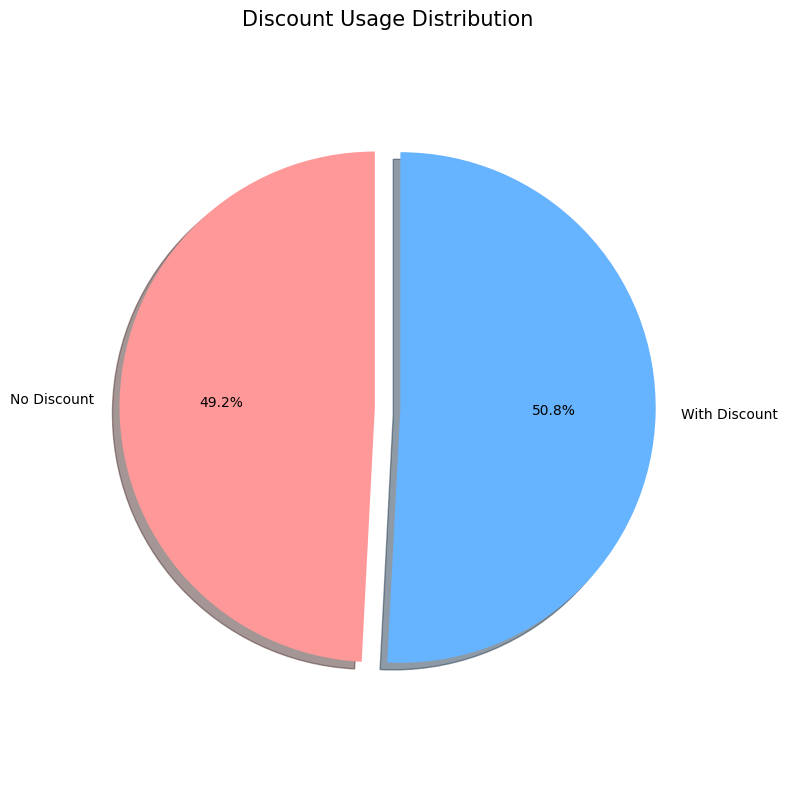


All 6 visualizations completed, displayed, and saved to the 'visualizations' directory


In [1]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Create visualizations directory if needed
os.makedirs('visualizations', exist_ok=True)

# Find and load the dataset
dataset_path = None
for path in ['data/coffee_sales_prepared.csv', 'coffee_sales_prepared.csv', 'DatasetForCoffeeSales2.csv', 'data/DatasetForCoffeeSales2.csv']:
    if os.path.exists(path):
        dataset_path = path
        break

if not dataset_path:
    raise FileNotFoundError("Dataset not found")

print(f"Loading dataset from {dataset_path}")
df = pd.read_csv(dataset_path)

# ALWAYS convert Date to datetime
try:
    df['Date'] = pd.to_datetime(df['Date'])
    print("Date column converted to datetime")
except:
    print("Warning: Issue with Date column conversion")

# Add necessary columns if not present
if 'Coffee_Bean_Type' not in df.columns and 'Product' in df.columns:
    df['Coffee_Bean_Type'] = df['Product']

if 'Bean_Category' not in df.columns and 'Unit Price' in df.columns:
    df['Bean_Category'] = df['Unit Price'].apply(lambda x: 'Premium' if x >= 40 else 'Standard')

if 'Price_Category' not in df.columns and 'Unit Price' in df.columns:
    price_map = {30: 'Budget', 35: 'Standard', 40: 'Premium', 45: 'Luxury'}
    df['Price_Category'] = df['Unit Price'].map(price_map)

print(f"Dataset loaded with {len(df)} rows")
print(f"Columns: {', '.join(df.columns)}")

# 1. Bar Chart: Coffee Bean Types Distribution
plt.figure(figsize=(10, 6))
bean_counts = df['Coffee_Bean_Type'].value_counts()
plt.bar(bean_counts.index, bean_counts.values, color='orange')
plt.title('Distribution of Coffee Bean Types', fontsize=15)
plt.xlabel('Coffee Bean Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(bean_counts.values):
    plt.text(i, v + 2, str(v), ha='center')
plt.tight_layout()
plt.savefig('visualizations/bean_distribution.png')
print("Visualization 1: Bean distribution chart")
plt.show()  # Display the plot

# 2. Bar Chart: Price Categories
plt.figure(figsize=(10, 6))
price_counts = df['Price_Category'].value_counts()
if 'Budget' in price_counts and 'Standard' in price_counts and 'Premium' in price_counts and 'Luxury' in price_counts:
    price_counts = price_counts.reindex(['Budget', 'Standard', 'Premium', 'Luxury'])
plt.bar(price_counts.index, price_counts.values, color='skyblue')
plt.title('Distribution of Price Categories', fontsize=15)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, v in enumerate(price_counts.values):
    plt.text(i, v + 2, str(v), ha='center')
plt.tight_layout()
plt.savefig('visualizations/price_categories.png')
print("Visualization 2: Price categories chart")
plt.show()  # Display the plot

# 3. Scatter Plot: Price vs Quantity
plt.figure(figsize=(10, 6))
plt.scatter(df['Unit Price'], df['Quantity'], alpha=0.5)
plt.title('Price vs Quantity Relationship', fontsize=15)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
# Add trend line
z = np.polyfit(df['Unit Price'], df['Quantity'], 1)
p = np.poly1d(z)
plt.plot(sorted(df['Unit Price'].unique()), p(sorted(df['Unit Price'].unique())), "r--", linewidth=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/price_quantity_relationship.png')
print("Visualization 3: Price-quantity relationship chart")
plt.show()  # Display the plot

# 4. Boxplot: Quantity by Bean Category
plt.figure(figsize=(10, 6))
# Fix for Matplotlib 3.9+ compatibility
boxplot_data = [df[df['Bean_Category'] == 'Standard']['Quantity'],
                df[df['Bean_Category'] == 'Premium']['Quantity']]
plt.boxplot(boxplot_data)
plt.xticks([1, 2], ['Standard', 'Premium'])  # Use xticks instead of labels
plt.title('Quantity Distribution by Bean Category', fontsize=15)
plt.xlabel('Bean Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/bean_category_boxplot.png')
print("Visualization 4: Bean category boxplot")
plt.show()  # Display the plot

# 5. Line Chart: Monthly Sales (with trend line)
# Check if we can extract month data
if 'Month' in df.columns:
    print("Using existing Month column")
    monthly_data = df.groupby('Month')['Final Sales'].sum()
    months = monthly_data.index
else:
    print("Creating Month column from Date")
    # Ensure Date is datetime and create Month column
    if pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Month'] = df['Date'].dt.month
        monthly_data = df.groupby('Month')['Final Sales'].sum()
        months = monthly_data.index
    else:
        print("Warning: Date column not in datetime format. Using Month 1-12 as example")
        # Create sample monthly data if we can't extract from Date
        months = range(1, 13)
        monthly_data = pd.Series(
            [52074, 51151, 56519, 47862, 51975, 57208, 56222, 54931, 53420, 47432, 51569, 49365],
            index=months
        )

plt.figure(figsize=(12, 6))
# Line plot with markers instead of bar chart
plt.plot(months, monthly_data.values, 'o-', color='#2c6fbb', linewidth=2, markersize=8)
plt.title('Monthly Total Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

# Add data labels above each point
for i, v in enumerate(monthly_data.values):
    plt.text(list(months)[i], v + 500, f'${v:.0f}', ha='center')

# Add trend line
z = np.polyfit(months, monthly_data.values, 1)
p = np.poly1d(z)
plt.plot(months, p(months), "r--", alpha=0.7,
         label=f"Trend: {z[0]:.2f}x + {z[1]:.2f}")

# Add legend with trend line equation
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),
           facecolor='white', framealpha=1)

plt.tight_layout()
plt.savefig('visualizations/monthly_sales_line.png')
print("Visualization 5: Monthly sales line chart")
plt.show()  # Display the plot

# 6. Pie Chart: Discount Usage
plt.figure(figsize=(8, 8))
discount_counts = df['Used_Discount'].value_counts()
labels = ['No Discount', 'With Discount']
# Handle boolean vs. string representations of True/False
if True in discount_counts.index:
    values = [discount_counts.get(False, 0), discount_counts.get(True, 0)]
elif 'True' in discount_counts.index:
    values = [discount_counts.get('False', 0), discount_counts.get('True', 0)]
else:
    values = [discount_counts.iloc[0], discount_counts.iloc[1]]
    print(f"Warning: Unusual discount values: {discount_counts.index}")

plt.pie(values, labels=labels, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'], explode=(0, 0.1),
        shadow=True, startangle=90)
plt.title('Discount Usage Distribution', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.savefig('visualizations/discount_usage.png')
print("Visualization 6: Discount usage chart")
plt.show()  # Display the plot

print("\nAll 6 visualizations completed, displayed, and saved to the 'visualizations' directory")
